In [1]:
import os
import geopandas

import json
import topojson

from IPython.display import SVG, display
from shapely import geometry
%matplotlib inline

### natural earth low resolution

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


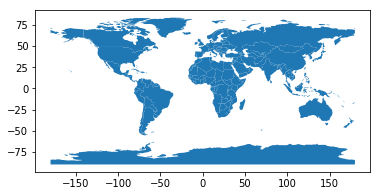

In [2]:
data = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
data.plot()
data.head()

In [5]:
# apply topolgy where vertices are snapped to a grid before applying topology (quantization)
tj_data = topojson.join(data)

In [6]:
tj_data

Join(
{'bookkeeping_geoms': [[0],
                       [1],
                       [2],
                       [3],
                       [4],
                       [5],
                       [6],
                       [7],
                       [8],
                       [9],
                       [10],
                       [11],
                       [12],
                       [13],
                       [14],
                       [15],
                       [16],
                       [17],
                       [18],
                       [19],
                       [20],
                       [21],
                       [22],
                       [23],
                       [24],
                       [25],
                       [26],
                       [27],
                       [28],
                       [29],
                       [30],
                       [31],
                       [32],
                       [33],
                  

In [ ]:
# write computed topology to file
tj_path = '../tests/files_topojson/naturalearth_lowres.topojson'
with open(tj_path, 'w') as fp:
    json.dump(tj_data, fp)

In [ ]:
# compare file sizes of the geojson and topjson file
gj_path = '../tests/files_geojson/naturalearth_lowres.geojson'
tj_kb = os.path.getsize(tj_path)/1000
gj_kb = os.path.getsize(gj_path)/1000
print('topojson naturalearth_loweres: {}kb\ngeojson naturalearth_loweres: {}kb'.format(tj_kb, gj_kb))

In [ ]:
# read the saved topojson file into geopandas and see that it works!
data_tj = geopandas.read_file(tj_path)
data_tj.plot()
data_tj.head()

In [ ]:
# for gdf_row in data_tj.iterrows():
#     print(gdf_row[1]['name'])
#     g1_svg = gdf_row[1].geometry._repr_svg_() 
#     display(SVG(g1_svg))

In [ ]:
%%prun -l 10
# present timing of applying the whole topology
tj_data = topojson.topology(data, snap_vertices=True, gridsize_to_snap=1e6)

In [ ]:
%%prun -l 10
# present timing split out in the different subtasks
ex = topojson.extract(data)
jo = topojson.join(ex, quant_factor=1e4)
cu = topojson.cut(jo)
de = topojson.dedup(cu)
ha = topojson.hashmap(de)